# Exercizes on clustering

Here you can find a program to read a data file in csv format. 

The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
    
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [28]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="content/"
file_path="../Datasets_for_clustering/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

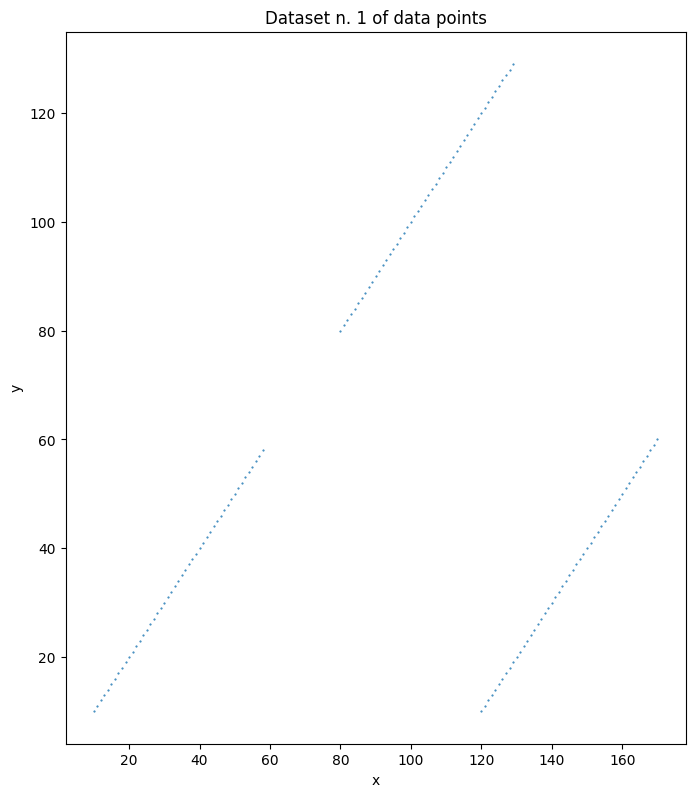

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0]) # Asse x abbiamo la prima feature
ax.set_ylabel(feature_names1[1]) # Asse y abbiamo la seconda feature

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

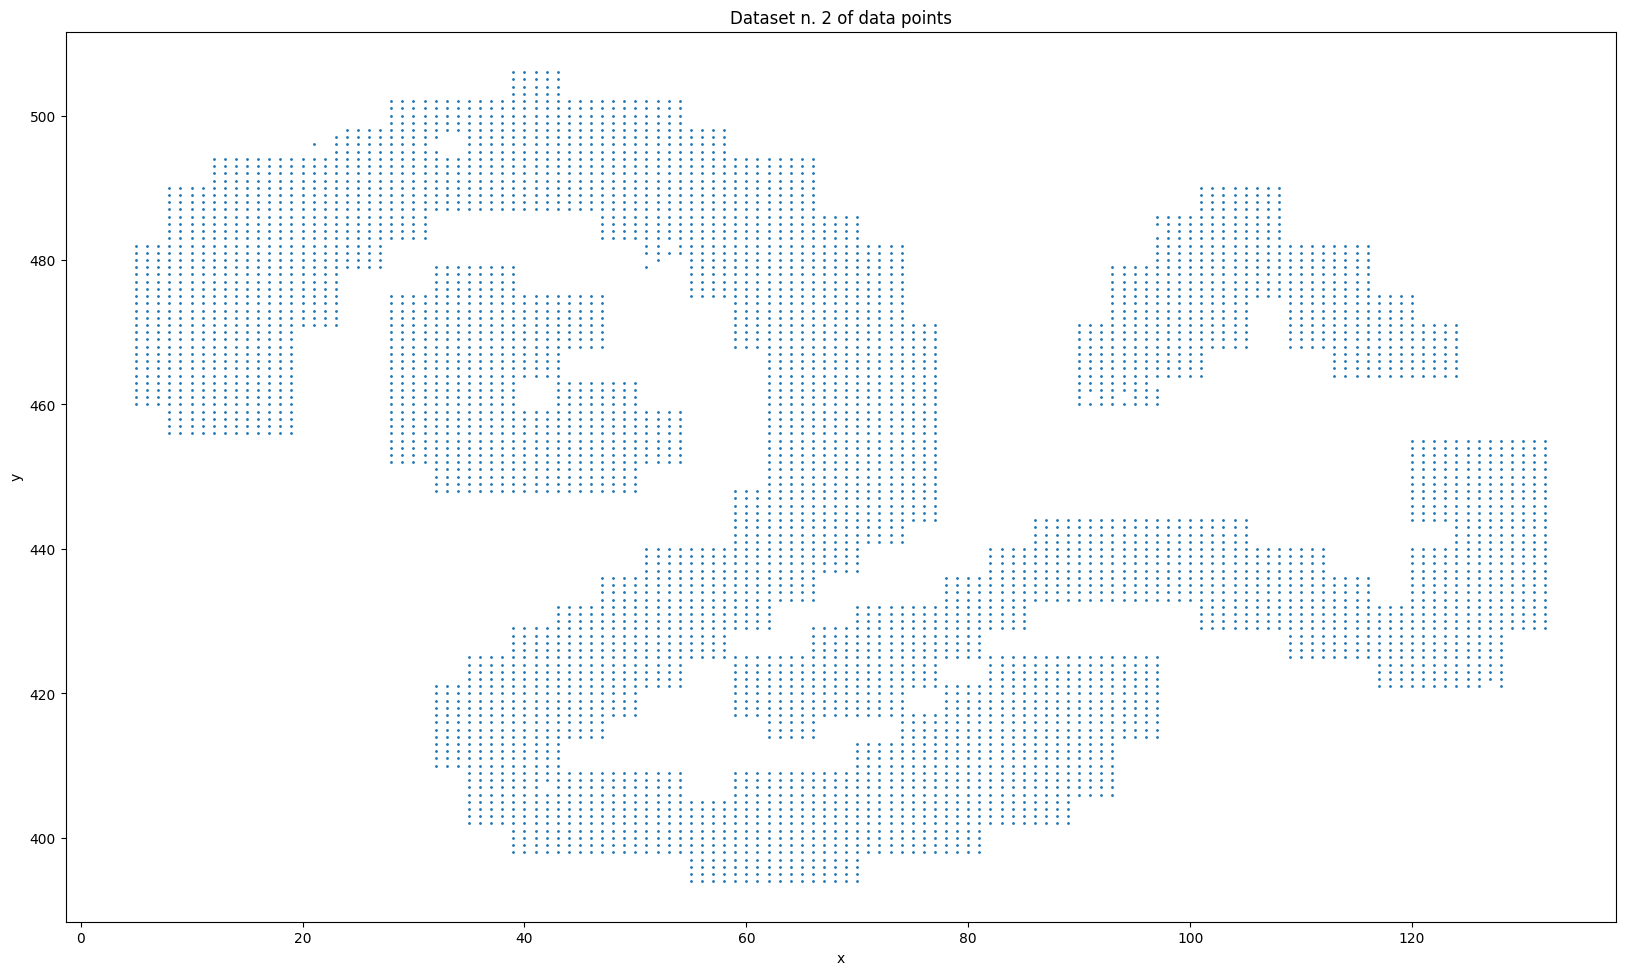

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

# Qua avremo problemi con k-means perchè cerca di creare cluster globulari e qui non si riesce

The following is the program for plotting the dataset n.3

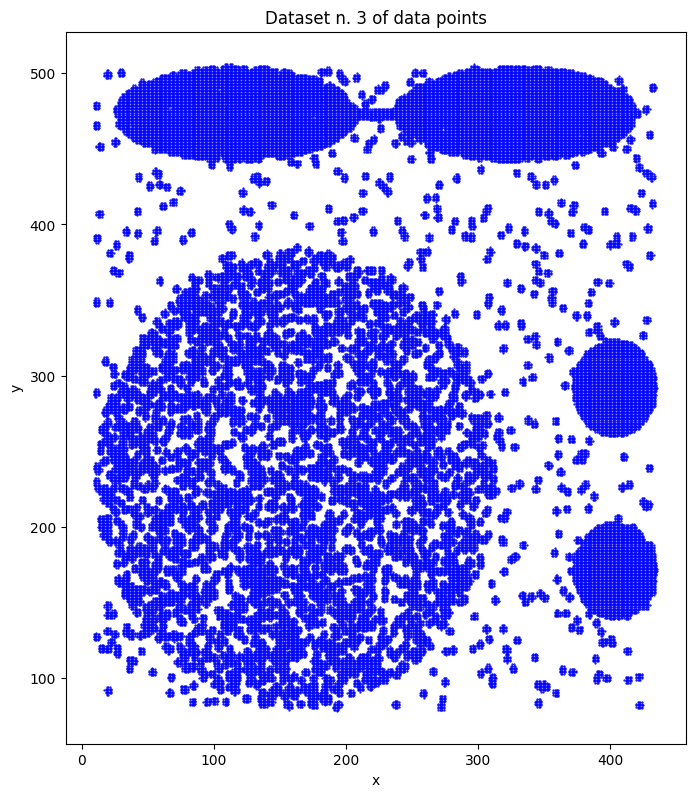

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

# Se da problemi di lentezza, si può utilizzare il knowledge discovery e utilizzare tipo il 10% del dataset facendo campionamento

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [32]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="../Datasets_for_clustering/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)
cluster_labels1 = kmeans1.predict(data1)

i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(10.0,10.0)
in cluster n.0
Example n.1=(11.0,11.0)
in cluster n.0
Example n.2=(12.0,12.0)
in cluster n.0
Example n.3=(13.0,13.0)
in cluster n.0
Example n.4=(14.0,14.0)
in cluster n.0
Example n.5=(15.0,15.0)
in cluster n.0
Example n.6=(16.0,16.0)
in cluster n.0
Example n.7=(17.0,17.0)
in cluster n.0
Example n.8=(18.0,18.0)
in cluster n.0
Example n.9=(19.0,19.0)
in cluster n.0
Example n.10=(20.0,20.0)
in cluster n.0
Example n.11=(21.0,21.0)
in cluster n.0
Example n.12=(22.0,22.0)
in cluster n.0
Example n.13=(23.0,23.0)
in cluster n.0
Example n.14=(24.0,24.0)
in cluster n.0
Example n.15=(25.0,25.0)
in cluster n.0
Example n.16=(26.0,26.0)
in cluster n.0
Example n.17=(27.0,27.0)
in cluster n.0
Example n.18=(28.0,28.0)
in cluster n.0
Example n.19=(29.0,29.0)
in cluster n.0
Example n.20=(30.0,30.0)
in cluster n.0
Example n.21=(31.0,31.0)
in cluster n.0
Example n.22=(32.0,32.0)
in cluster n.0
Example n.23=(33.0,33.0)
in cluster n.0
Example n.24=(34.0,34.0)
in cluster n.0
Example n.

In the following program we plot the clusters

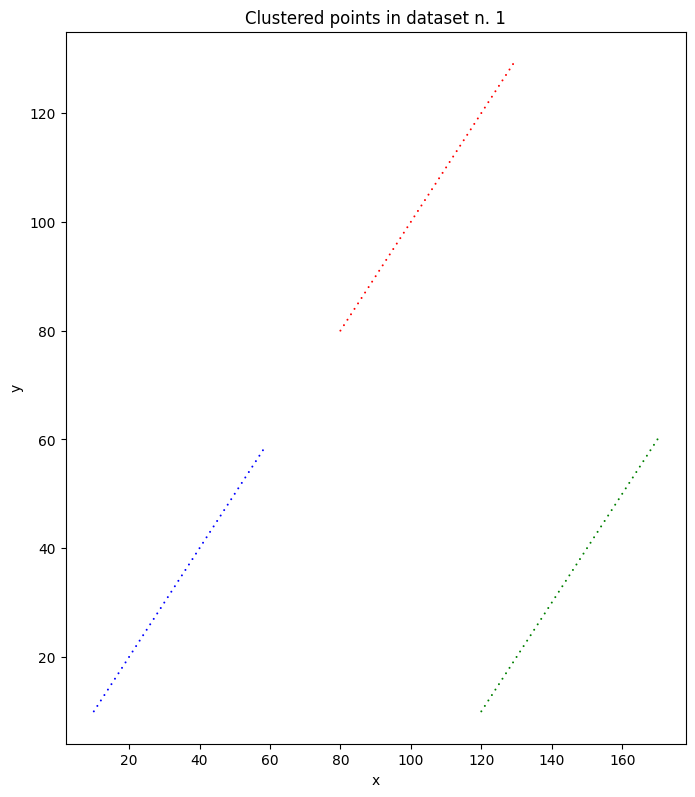

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=1)

plt.show()

## Definisco funzioni di K-Means

In [77]:
from sklearn.cluster import KMeans

def compute_kmeans(dataset, k):
    random_seed = np.random.seed(0)
    kmeans = KMeans(n_clusters=k, random_state=random_seed).fit(dataset)
    cluster_labels = kmeans.predict(dataset)
    return kmeans, cluster_labels

In [35]:
def plot(title, data, n_samples, k, kmeans):
    fig = plt.figure(figsize=(8,8))

    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=1)
    ax.set_title(title)

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # set the list of colors to be selected when plotting the different clusters
    color=['b','g','r','c','m','y','k','w']

    for clu in range(k):
        data_list_x = [data[i,0] for i in range(n_samples) if kmeans.labels_[i]==clu]
        data_list_y = [data[i,1] for i in range(n_samples) if kmeans.labels_[i]==clu]
        plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=1)

## Nella cella successiva ho eseguito K-means sul dataset 2 e plottato il risultato

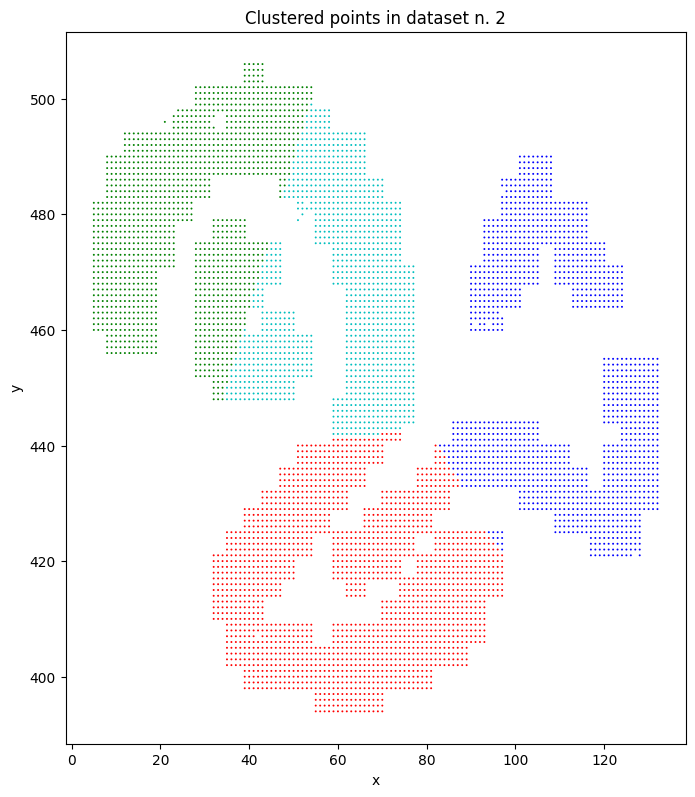

In [73]:
import matplotlib.pyplot as plt

k = 4
kmeans2, cluster_labels2 = compute_kmeans(data2, k)

plot('Clustered points in dataset n. 2', data2, n_samples2, k, kmeans2)

## Nella cella successiva ho eseguito K-means sul dataset 3 e plottato il risultato

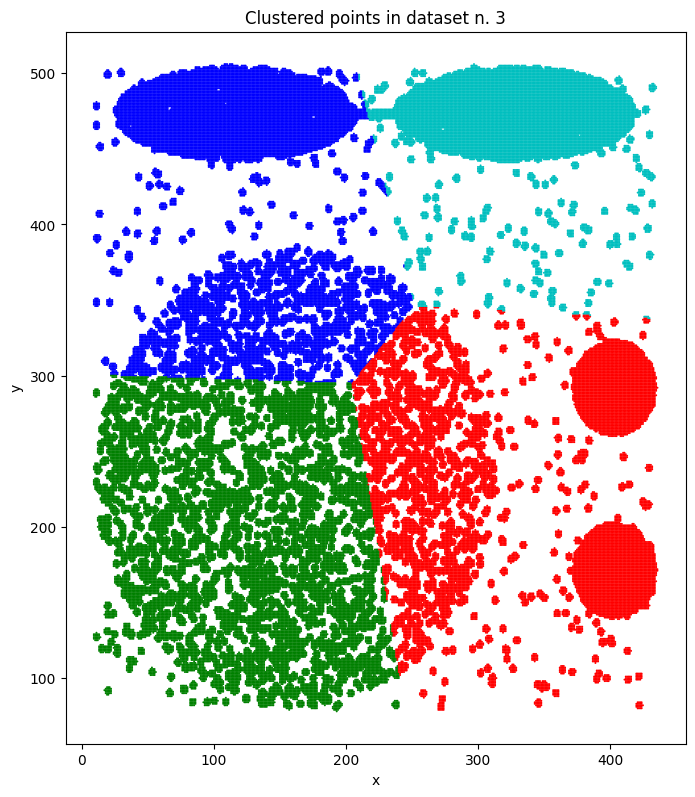

In [37]:
import matplotlib.pyplot as plt
k = 4
kmeans3, cluster_labels3 = compute_kmeans(data3, k)

plot('Clustered points in dataset n. 3', data3, n_samples3, k, kmeans3)

## Definisco funzioni per la Silhouette

In [45]:
from sklearn.metrics import silhouette_score
def compute_silhouette_score(dataset, k):
    _, cluster_labels = compute_kmeans(dataset, k)
    return silhouette_score(dataset, cluster_labels)

## Silhouette Analysis per il dataset 1

In [50]:
best_silhouette = -1
best_k = None
best_kmeans = None
for num in range(2,12):
    k = num
    silhouette_avg1 = compute_silhouette_score(data1, k)
    if (silhouette_avg1 > best_silhouette):
        best_silhouette = silhouette_avg1
        best_k = k
        best_kmeans = kmeans1
    print(
        "For n_clusters =",
        k,
        "The average silhouette_score is :",
        silhouette_avg1,
    )

For n_clusters = 2 The average silhouette_score is : 0.5651096232579514
For n_clusters = 3 The average silhouette_score is : 0.7229402453727759
For n_clusters = 4 The average silhouette_score is : 0.6824925173029859
For n_clusters = 5 The average silhouette_score is : 0.6358957746571624
For n_clusters = 6 The average silhouette_score is : 0.6113129278986535
For n_clusters = 7 The average silhouette_score is : 0.595587703417737
For n_clusters = 8 The average silhouette_score is : 0.5798237614544337
For n_clusters = 9 The average silhouette_score is : 0.5655287896062917
For n_clusters = 10 The average silhouette_score is : 0.5556981396710137
For n_clusters = 11 The average silhouette_score is : 0.5466978848307029


## Silhouette Analysis per il dataset 2

In [ ]:
best_silhouette = -1
best_k = None
best_kmeans = None
for num in range(2,12):
    k = num
    silhouette_avg2 = compute_silhouette_score(data2, k)
    if (silhouette_avg2 > best_silhouette):
        best_silhouette = silhouette_avg2
        best_k = k
        best_kmeans = kmeans2
    print(
        "For n_clusters =",
        k,
        "The average silhouette_score is :",
        silhouette_avg2,
    )

For n_clusters = 2 The average silhouette_score is : 0.43322366812579544
For n_clusters = 3 The average silhouette_score is : 0.47977770120112256
For n_clusters = 4 The average silhouette_score is : 0.4165945460308033
For n_clusters = 5 The average silhouette_score is : 0.4256111365510684
For n_clusters = 6 The average silhouette_score is : 0.41166328241333594
For n_clusters = 7 The average silhouette_score is : 0.4337052476160541
For n_clusters = 8 The average silhouette_score is : 0.4452323942316648
For n_clusters = 9 The average silhouette_score is : 0.4473004168330033
For n_clusters = 10 The average silhouette_score is : 0.43970093979355046
For n_clusters = 11 The average silhouette_score is : 0.43646487934460665


## Rendo il dataset più piccolo per riuscire ad eseguire la Silhouette

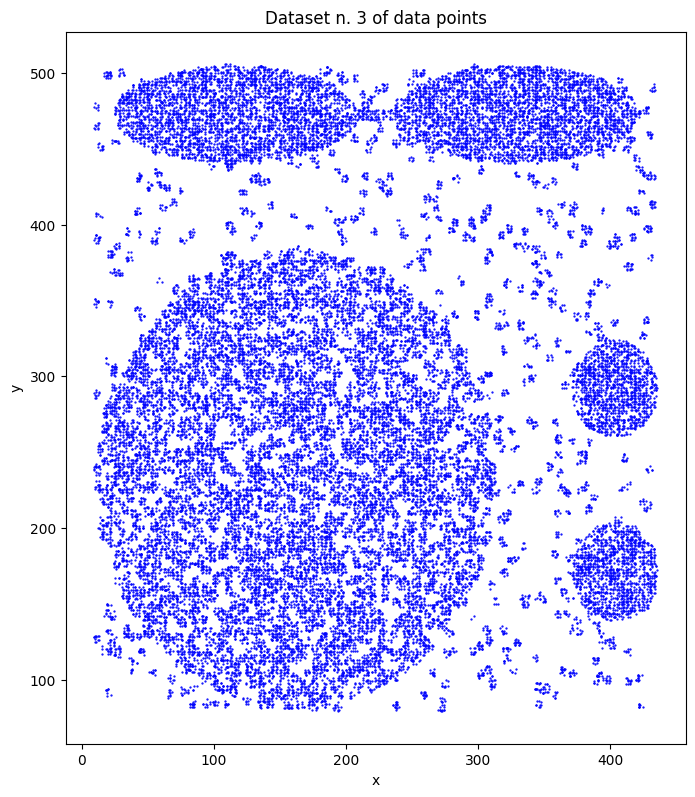

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

arrayIndex = np.random.randint(0, len(data3), size=int(len(data3)*0.4))
data3_extract = data3[arrayIndex, :]


#plot the dataset
plt.plot(data3_extract[:,0], data3_extract[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## Silhouette Analysis per il dataset 3

In [ ]:
best_silhouette = -1
best_k = None
best_kmeans = None
for num in range(2,12):
    k = num
    silhouette_avg3 = compute_silhouette_score(data3_extract, k)
    if (silhouette_avg3 > best_silhouette):
        best_silhouette = silhouette_avg3
        best_k = k
        best_kmeans = kmeans3
    print(
        "For n_clusters =",
        k,
        "The average silhouette_score is :",
        silhouette_avg3,
    )

For n_clusters = 2 The average silhouette_score is : 0.38475567292215573
For n_clusters = 3 The average silhouette_score is : 0.3910699994023012
For n_clusters = 4 The average silhouette_score is : 0.41090381036939866
For n_clusters = 5 The average silhouette_score is : 0.4153620563012374
For n_clusters = 6 The average silhouette_score is : 0.42925541213813134
For n_clusters = 7 The average silhouette_score is : 0.4259065933454072
For n_clusters = 8 The average silhouette_score is : 0.4279865023313025
For n_clusters = 9 The average silhouette_score is : 0.4176670638259811
For n_clusters = 10 The average silhouette_score is : 0.4006281577803396
For n_clusters = 11 The average silhouette_score is : 0.411400990310625


## Plot della Silhouette con differenti numero k di clusters per il dataset 1

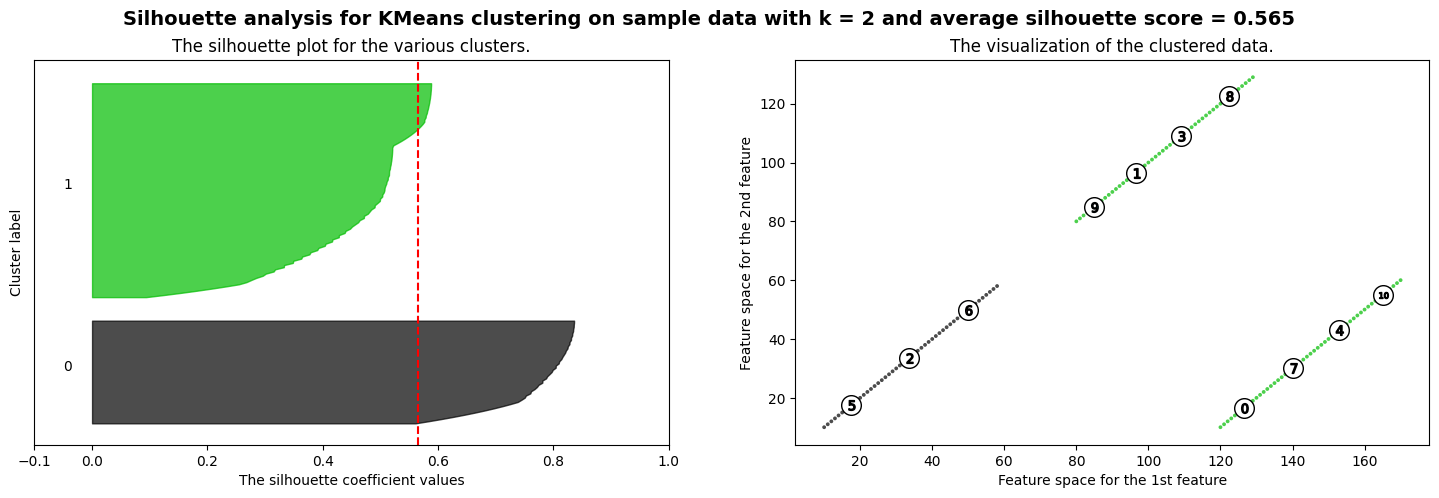

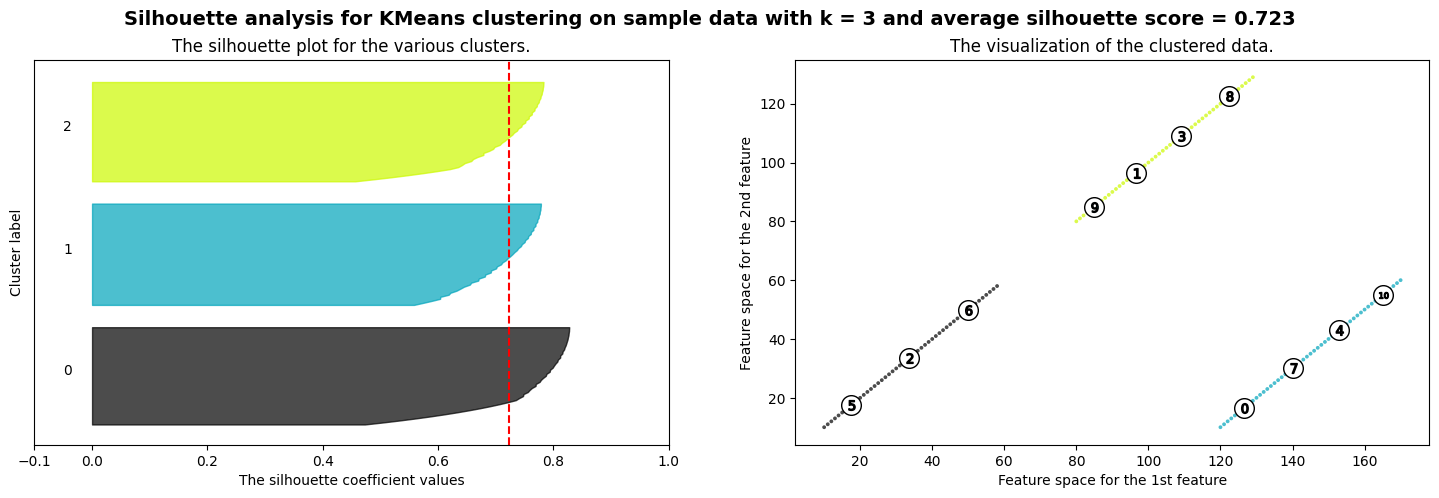

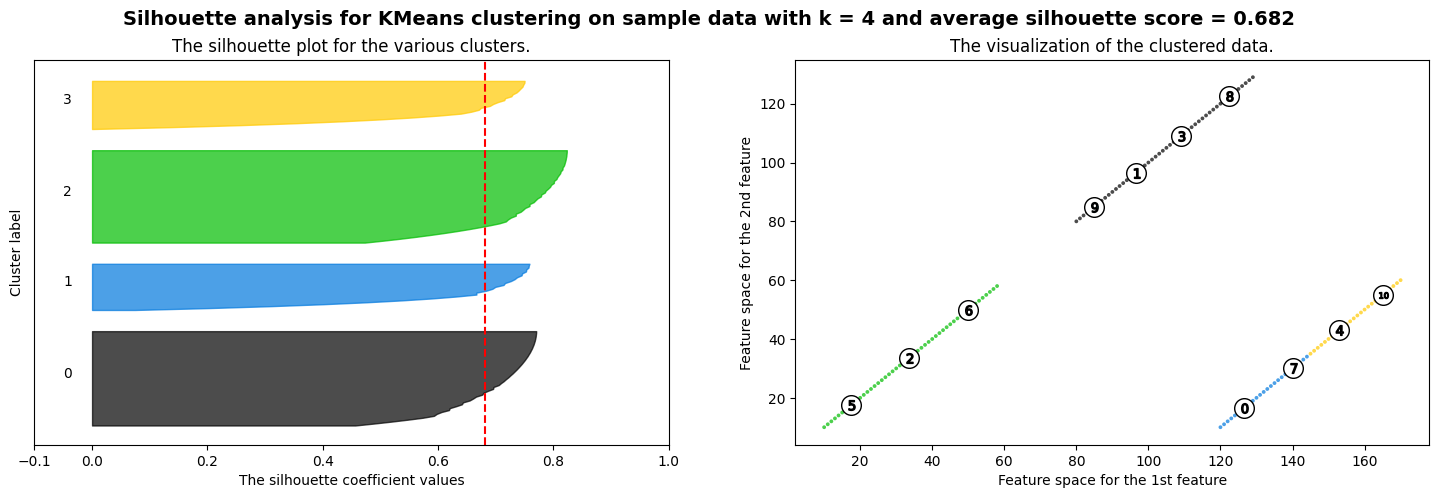

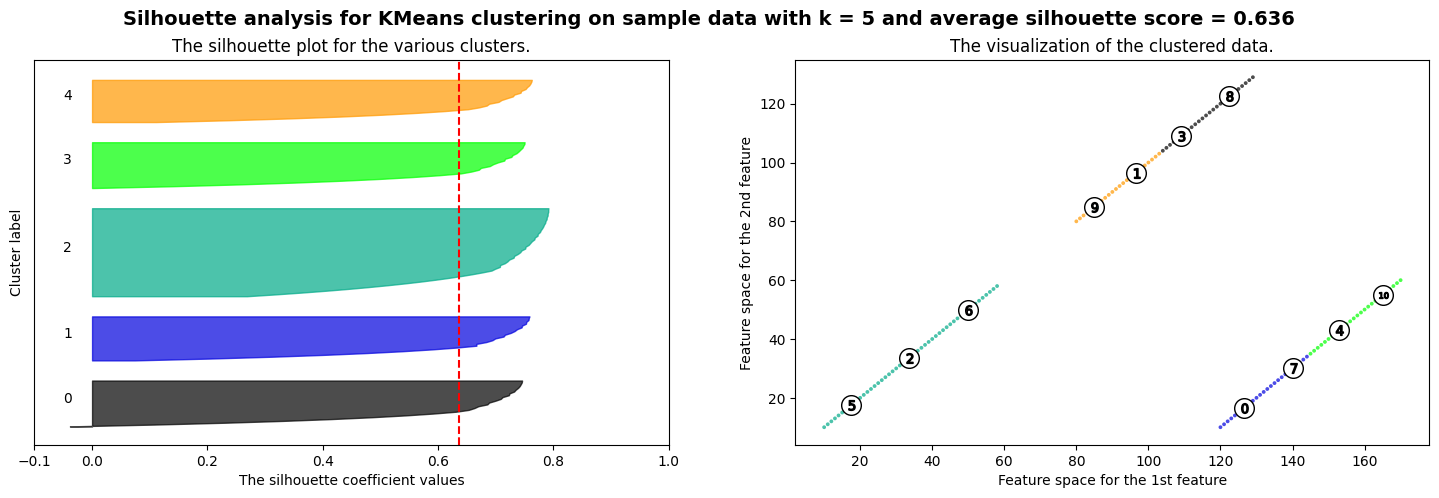

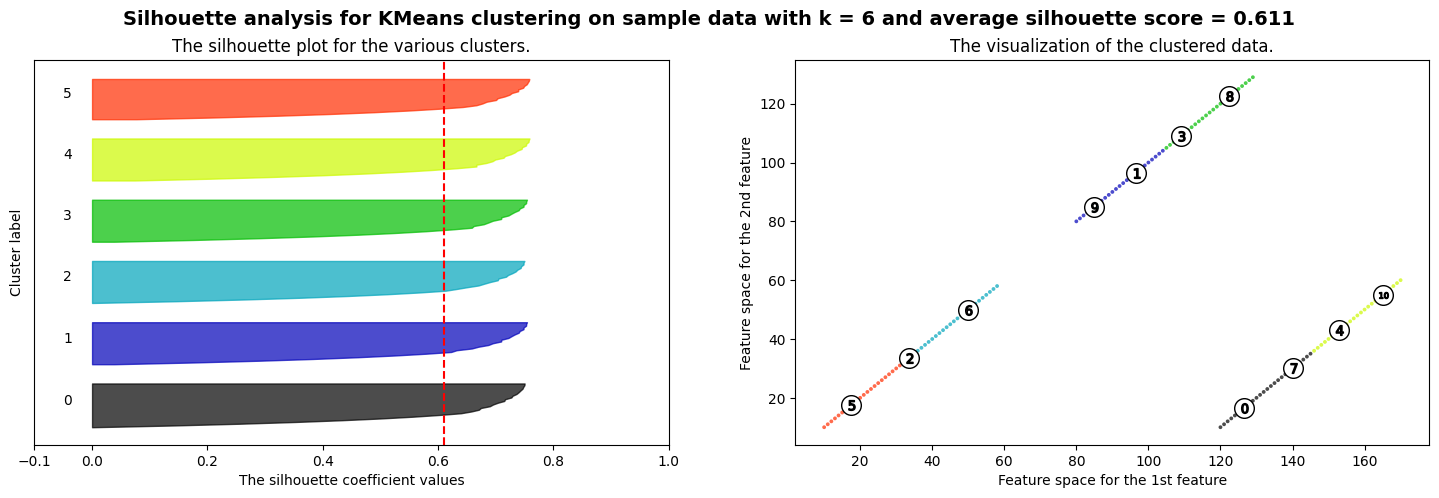

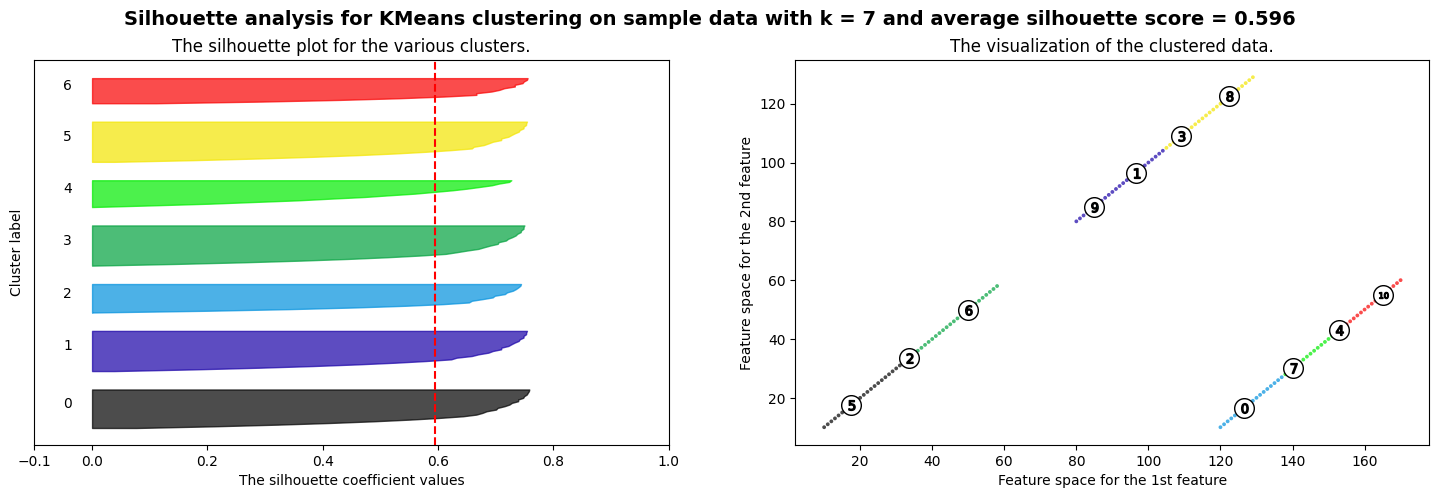

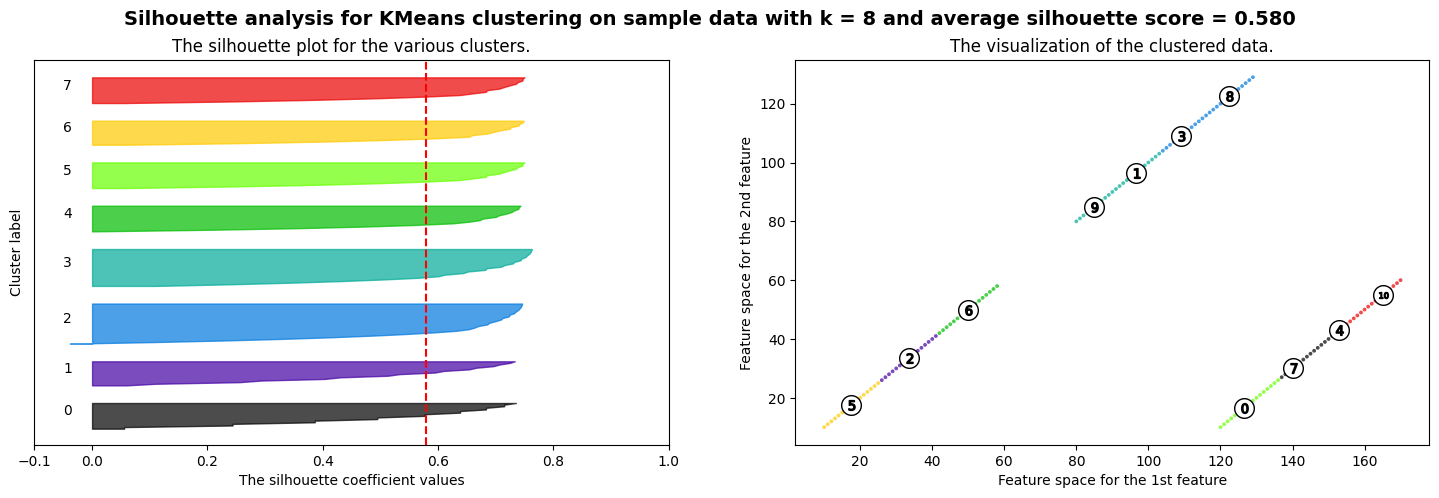

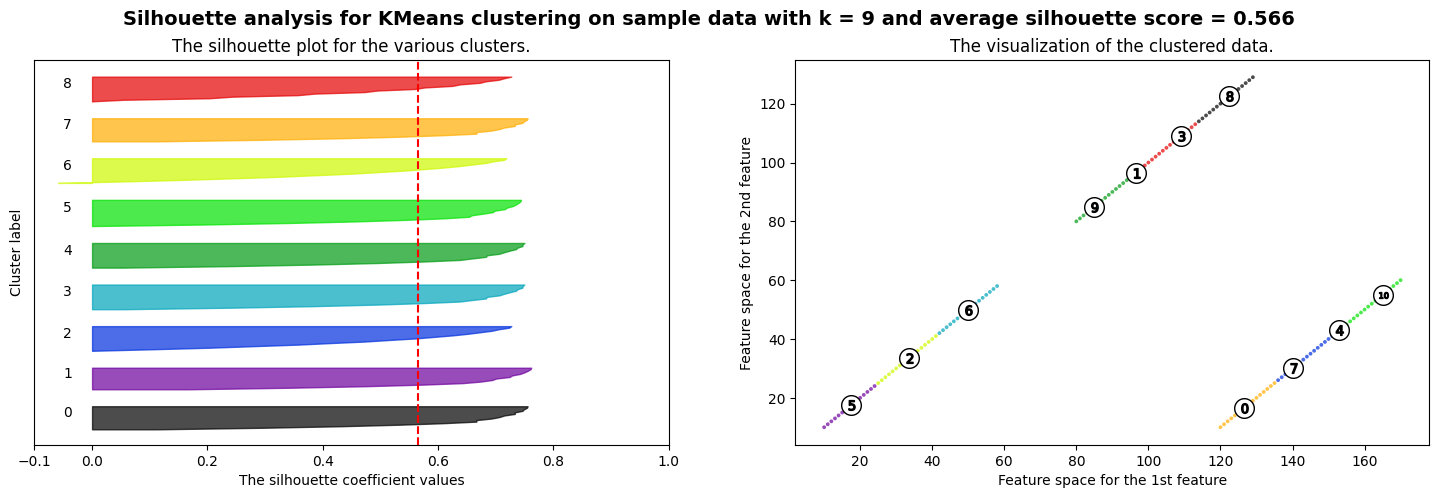

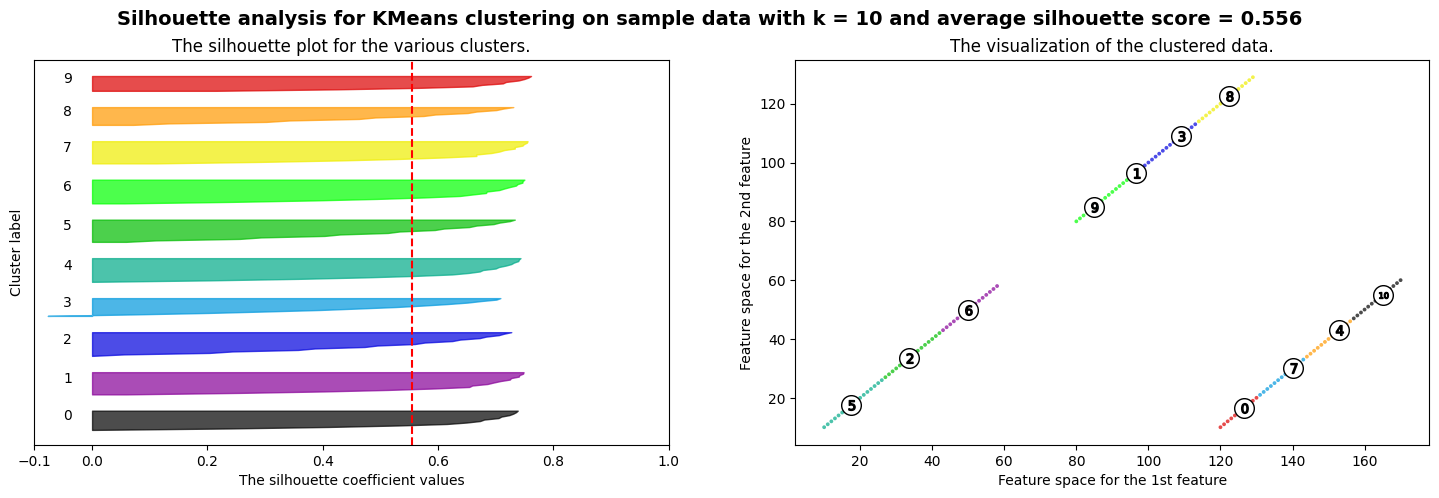

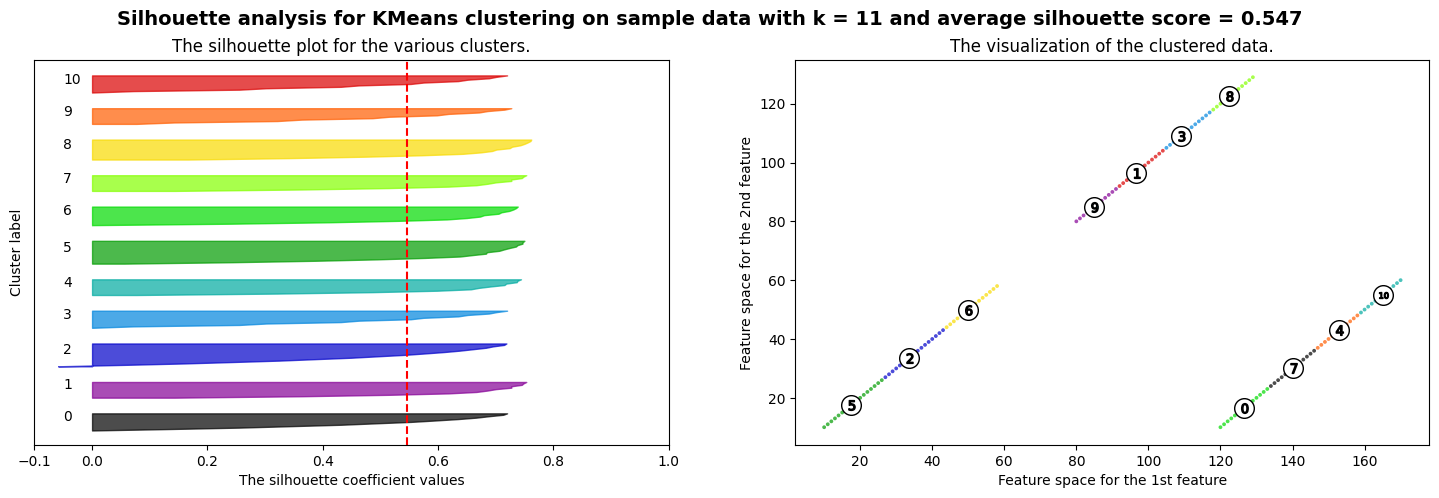

In [78]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

sample_silhouette_values = silhouette_samples(data1, cluster_labels1)

for n_clusters in range(2, 12):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([0, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans, cluster_labels  = compute_kmeans(data1, n_clusters)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data1, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data1[:, 0], data1[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with k = %d and average silhouette score = %.3f"
        % (n_clusters, silhouette_avg),
        fontsize=14,
        fontweight="bold",
    )

plt.show()

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.